In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# 1. Lion Data cleanning

In [3]:
LION21A = gpd.read_file('./Data/GeoBase/LION_21A/LION_21A.shp')
LION21A.head()

,OBJECTID,Street,SAFStreetN,FeatureTyp,SegmentTyp,IncExFlag,RB_Layer,NonPed,TrafDir,TrafSrc,...,FromLeft,ToLeft,FromRight,ToRight,Join_ID,L_PD_Servi,R_PD_Servi,TRUCK_ROUT,SHAPE_Leng,geometry
0,1.0,EAST 168 STREET,None,0,U,None,B,None,T,DOT,...,599,699,596,716,2251001000000,None,None,None,396.030947,"LINESTRING (1010964.447 241812.261, 1011265.49..."
1,2.0,WEST 192 STREET,None,0,U,None,B,None,A,DOT,...,58,98,63,99,2798401000000,None,None,None,279.360514,"LINESTRING (1011576.687 255023.583, 1011335.15..."
2,3.0,UNION AVENUE,None,0,U,None,B,None,W,DOT,...,1017,1079,1016,1084,2728001000000,None,None,None,618.327133,"LINESTRING (1011600.676 239639.743, 1011785.79..."
3,4.0,UNION AVENUE,BEHAGEN PLAYGROUND COMFORT STA,0,U,None,B,None,W,DOT,...,0,0,0,0,21279502000000X,None,None,None,618.327133,"LINESTRING (1011600.676 239639.743, 1011785.79..."
4,5.0,UNION AVENUE,BEHAGEN PLAYGROUND FIELD NORTH,0,U,None,B,None,W,DOT,...,0,0,0,0,21279503000000X,None,None,None,618.327133,"LINESTRING (1011600.676 239639.743, 1011785.79..."


In [154]:
len(LION21A)

230558

In [155]:
Corridor = LION21A.copy()
Corridor = Corridor.loc[(Corridor['FeatureTyp'] == '0') | (Corridor['FeatureTyp'] == '1') ] #street and railroad
Corridor = Corridor.loc[(Corridor['RB_Layer']=='G') | (Corridor['RB_Layer']=='B')] # only centre line
Corridor = Corridor.loc[(Corridor['TrafDir']!='P')] #filter out ped only street
Corridor = Corridor.drop_duplicates(subset=['SegmentID'], keep='first')
len(Corridor)

132385

In [163]:
Corridor['RBoro'].unique()

array([ 2., nan,  3.,  1.,  4.,  5.])

In [166]:
# filter out the staten island network
Corridor_nyc = Corridor.loc[Corridor['LBoro'].isin([1., 2., 3., 4.])]
Corridor_nyc = Corridor.loc[Corridor['RBoro'].isin([1., 2., 3., 4.])]
len(Corridor_nyc)

116061

In [170]:
Corridor_nyc = Corridor_nyc.to_crs(4326)

<AxesSubplot:>

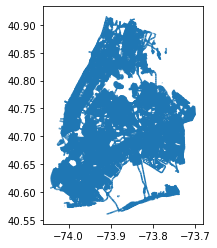

In [171]:
Corridor_nyc.plot()

In [172]:
pd.options.display.max_columns = 150

In [173]:
Corridor_nyc = Corridor_nyc[['OBJECTID','Street', 'StreetCode', 'SegmentID','SHAPE_Leng','geometry','StreetWidt', 'BikeLane','Number_Tra','Number_Par','Number_Tot','TRUCK_ROUT','LBoro']]
Corridor_nyc.head()

,OBJECTID,Street,StreetCode,SegmentID,SHAPE_Leng,geometry,StreetWidt,BikeLane,Number_Tra,Number_Par,Number_Tot,TRUCK_ROUT,LBoro
0,1.0,EAST 168 STREET,226700,0078126,396.030947,"LINESTRING (-73.90347 40.83035, -73.90238 40.8...",34.0,None,2,2,4,None,2.0
1,2.0,WEST 192 STREET,274810,0079796,279.360514,"LINESTRING (-73.90120 40.86661, -73.90207 40.8...",30.0,None,1,2,3,None,2.0
2,3.0,UNION AVENUE,270420,0077356,618.327133,"LINESTRING (-73.90118 40.82439, -73.90051 40.8...",34.0,None,1,2,3,None,2.0
7,8.0,WEST 252 STREET,275175,0174633,16.897559,"LINESTRING (-73.90707 40.89927, -73.90712 40.8...",30.0,None,2,None,2,None,2.0
8,9.0,CLAREMONT PARKWAY,219720,0078173,252.183072,"LINESTRING (-73.90538 40.83977, -73.90454 40.8...",70.0,None,4,2,6,None,2.0


In [174]:
Corridor_nyc.BikeLane.unique()

array([None, '2', '3', '11', '1', '4', '8', '7', '6', '5', '10', '9'],
      dtype=object)

In [175]:
Corridor_nyc['BikeLane'] = Corridor_nyc['BikeLane'].fillna(0)

/Users/taoliang/opt/anaconda3/envs/MLC/lib/python3.7/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [176]:
Corridor_nyc['BikeLane'].unique()

array([0, '2', '3', '11', '1', '4', '8', '7', '6', '5', '10', '9'],
      dtype=object)

In [177]:
# LIST OF VALUES
# VALUE 1
# DESCRIPTION Class 1: Separated Greenway
# VALUE 2
# DESCRIPTION Class II: Striped Bike Lane
# VALUE 3
# DESCRIPTION Class III: Signed Bicycle Route
# VALUE 4
# DESCRIPTION Links: Connecting segments.
# VALUE 5
# DESCRIPTION Class I, II: Combination of Class I and II
# VALUE 6
# DESCRIPTION Class II, III: Combination of Class II and III
# VALUE 7
# DESCRIPTION Stairs: Includes step streets, bridge stairs, etc. 

### Dummy variables

In [178]:
Corridor_nyc['With_BikeLane'] = [1 if n != 0 else 0 for n in Corridor_nyc.BikeLane]
sum(Corridor_nyc['With_BikeLane'])

11956

In [179]:
a=['1','5']
Corridor_nyc['Protected_Lane'] = [1 if n in a else 0 for n in Corridor_nyc.BikeLane]
sum(Corridor_nyc['Protected_Lane'])

2100

In [180]:
b=['1','5', 0]
Corridor_nyc['Unprotected_Lane'] = [0 if n in b else 1 for n in Corridor_nyc.BikeLane]
sum(Corridor_nyc['Unprotected_Lane'])

9856

In [181]:
Corridor_nyc.TRUCK_ROUT.unique()

array([None, '2', '3'], dtype=object)

In [182]:
c=['2','3']
Corridor_nyc['Truck'] = [1 if n in c else 0 for n in Corridor_nyc.TRUCK_ROUT]
sum(Corridor_nyc['Truck'])

13919

In [183]:
Corridor_nyc = Corridor_nyc.dropna(subset=['StreetWidt']).drop(columns=['TRUCK_ROUT','BikeLane'])
len(Corridor_nyc)

93685

In [188]:
Corridor_nyc = pd.get_dummies(Corridor_nyc, columns=['LBoro'])

In [204]:
Corridor_nyc.columns = ['OBJECTID', 'Street', 'StreetCode', 'SegmentID', 'SHAPE_Leng',
                        'geometry', 'StreetWidt', 'Number_Tra', 'Number_Par', 'Number_Tot',
                        'With_BikeLane', 'Protected_Lane', 'Unprotected_Lane', 'Truck',
                        'Manhattan','Bronx','Brooklyn','Queens']

In [206]:
Corridor_nyc  = Corridor_nyc.loc[Corridor_nyc['StreetWidt'] > 0]
Corridor_nyc['Number_Tra'] = Corridor_nyc['Number_Tra'].fillna(0).astype(int)
Corridor_nyc['Number_Par'] = Corridor_nyc['Number_Par'].fillna(0).astype(int)
Corridor_nyc['Number_Tot'] = Corridor_nyc['Number_Tot'].fillna(0).astype(int)
Corridor_nyc.describe()

/Users/taoliang/opt/anaconda3/envs/MLC/lib/python3.7/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


,OBJECTID,SHAPE_Leng,StreetWidt,Number_Tra,Number_Par,Number_Tot,With_BikeLane,Protected_Lane,Unprotected_Lane,Truck,Manhattan,Bronx,Brooklyn,Queens
count,93202.000000,93202.000000,93202.000000,93202.000000,93202.000000,93202.000000,93202.000000,93202.000000,93202.000000,93202.000000,93202.000000,93202.000000,93202.000000,93202.000000
mean,95326.770520,284.169310,36.094322,1.703386,1.522821,3.225832,0.127733,0.022381,0.105352,0.148774,0.130223,0.178612,0.269447,0.420409
std,56292.937279,229.982606,11.857834,0.950921,0.808613,1.141376,0.333794,0.147922,0.307008,0.355867,0.336550,0.383029,0.443675,0.493627
min,1.000000,3.102845,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47310.250000,118.246423,30.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,97349.000000,256.615174,32.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,146424.750000,371.572854,42.000000,2.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,191603.000000,12484.330543,200.000000,16.000000,4.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [207]:
Corridor_nyc.to_file('./Data/GeoBase/Corridor_nyc.geojson', driver='GeoJSON')

# 2. Spatial join with social economic data

In [10]:
Corridor_nyc = gpd.read_file('./Data/GeoBase/Corridor_nyc.geojson').to_crs(2263)
Corridor_nyc.head()

,OBJECTID,Street,StreetCode,SegmentID,SHAPE_Leng,StreetWidt,Number_Tra,Number_Par,Number_Tot,With_BikeLane,Protected_Lane,Unprotected_Lane,Truck,Manhattan,Bronx,Brooklyn,Queens,geometry
0,1.0,EAST 168 STREET,226700,0078126,396.030947,34.0,2,2,4,0,0,0,0,0,1,0,0,"LINESTRING (1010964.447 241812.261, 1011265.49..."
1,2.0,WEST 192 STREET,274810,0079796,279.360514,30.0,1,2,3,0,0,0,0,0,1,0,0,"LINESTRING (1011576.687 255023.583, 1011335.15..."
2,3.0,UNION AVENUE,270420,0077356,618.327133,34.0,1,2,3,0,0,0,0,0,1,0,0,"LINESTRING (1011600.676 239639.743, 1011785.79..."
3,8.0,WEST 252 STREET,275175,0174633,16.897559,30.0,2,0,2,0,0,0,0,0,1,0,0,"LINESTRING (1009942.034 266921.538, 1009926.30..."
4,9.0,CLAREMONT PARKWAY,219720,0078173,252.183072,70.0,4,2,6,0,0,0,0,0,1,0,0,"LINESTRING (1010430.311 245241.982, 1010662.46..."


In [28]:
len(Corridor_nyc)

93202

In [11]:
Social_Economic = gpd.read_file("./Data/Social_Economic/Social_Economic.geojson", index_col=0).to_crs(2263)
Social_Economic.head()

,GeoID,Pop,Age,MIncome,White,Bachelor_Degree,Unemployment,M_Subway,M_Bike,NoVehicle,LandUseMix,geometry
0,36005000200,4167,37.9,68000.0,40.0,88.6,10.0,0.287821,0.000000,0.224627,0.160274,"POLYGON ((1023972.528 232680.658, 1023970.431 ..."
1,36005000400,5684,40.1,93155.0,67.8,92.0,4.3,0.261804,0.004559,0.208531,0.392961,"POLYGON ((1026849.274 235548.774, 1026749.976 ..."
2,36005001600,5917,39.3,34766.0,36.9,87.0,7.4,0.277778,0.009333,0.597771,0.442828,"POLYGON ((1024344.112 238946.021, 1024391.333 ..."
3,36005002300,4517,35.8,24474.0,22.4,55.1,12.0,0.553641,0.000000,0.829776,0.418240,"POLYGON ((1005597.155 234065.548, 1005499.975 ..."
4,36005002500,5694,32.0,27196.0,60.9,66.9,9.6,0.621647,0.024471,0.869048,0.284687,"POLYGON ((1007089.701 233231.768, 1007048.890 ..."


In [51]:
Social_Economic.describe()

,GeoID,Pop,Age,MIncome,White,Bachelor_Degree,Unemployment,M_Subway,M_Bike,NoVehicle,LandUseMix
count,1.955000e+03,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.00000,1955.000000,1955.000000,1955.000000,1955.000000
mean,3.605433e+10,3832.884399,38.159744,73517.762148,57.697647,83.562404,6.43156,0.391739,0.011332,0.481664,0.440990
std,2.589224e+07,1942.555994,6.953394,34891.293221,17.144003,9.414766,4.42455,0.180298,0.019344,0.241823,0.164632
min,3.600500e+10,64.000000,11.600000,11343.000000,0.000000,29.900000,0.00000,0.000000,0.000000,0.000000,0.018581
25%,3.604702e+10,2388.500000,33.700000,50511.500000,48.500000,79.500000,3.30000,0.259265,0.000000,0.266201,0.327191
50%,3.604711e+10,3515.000000,37.400000,69261.000000,57.900000,85.100000,5.60000,0.408490,0.000000,0.499210,0.432335
75%,3.608103e+10,4806.500000,42.050000,90022.500000,68.650000,89.800000,8.30000,0.534134,0.015596,0.689874,0.550567
max,3.608503e+10,16600.000000,85.100000,232302.000000,100.000000,100.000000,36.60000,0.819527,0.203605,1.000000,0.960401


In [57]:
Corridor_Buffer = Corridor_nyc.copy()
Corridor_Buffer['geometry'] = Corridor_Buffer.buffer(distance=2640, cap_style=2) # 0.5mile radius
Corridor_Buffer = Corridor_Buffer[['SegmentID','geometry']]
Corridor_Buffer.head()

,SegmentID,geometry
0,0078126,"POLYGON ((1012980.789 243561.777, 1009550.201 ..."
1,0079796,"POLYGON ((1010008.602 252881.446, 1012661.708 ..."
2,0077356,"POLYGON ((1009266.884 241020.084, 1014304.704 ..."
3,0174633,"POLYGON ((1008962.642 264469.870, 1010889.964 ..."
4,0078173,"POLYGON ((1011693.523 247573.825, 1009631.409 ..."


In [58]:
Corridor_SE = gpd.sjoin(Corridor_Buffer, Social_Economic, how="left", op='intersects')
Corridor_SE.head()

,SegmentID,geometry,index_right,GeoID,Pop,Age,MIncome,White,Bachelor_Degree,Unemployment,M_Subway,M_Bike,NoVehicle,LandUseMix
0,0078126,"POLYGON ((1012980.789 243561.777, 1009550.201 ...",78.0,3.600502e+10,5165.0,38.0,26474.0,30.7,70.3,9.0,0.424028,0.009086,0.629502,0.338584
0,0078126,"POLYGON ((1012980.789 243561.777, 1009550.201 ...",77.0,3.600501e+10,4611.0,27.9,23620.0,47.9,92.2,20.5,0.184983,0.000000,0.787736,0.356696
1,0079796,"POLYGON ((1010008.602 252881.446, 1012661.708 ...",172.0,3.600503e+10,7726.0,31.5,45188.0,33.6,59.5,9.3,0.459516,0.000000,0.680150,0.315264
1,0079796,"POLYGON ((1010008.602 252881.446, 1012661.708 ...",170.0,3.600503e+10,6155.0,29.0,38594.0,42.3,82.9,12.3,0.450262,0.041449,0.719766,0.329405
1,0079796,"POLYGON ((1010008.602 252881.446, 1012661.708 ...",176.0,3.600503e+10,6314.0,39.5,28617.0,42.5,100.0,8.6,0.390127,0.000000,0.683041,0.199271


In [59]:
Corridor_SE = Corridor_SE.groupby('SegmentID').mean().iloc[:,2:].reset_index()
Corridor_SE

,SegmentID,Pop,Age,MIncome,White,Bachelor_Degree,Unemployment,M_Subway,M_Bike,NoVehicle,LandUseMix
0,0016539,1625.000000,32.050000,104176.500000,53.050000,88.850000,1.000000,0.221378,0.000000,0.106228,0.196749
1,0016541,2323.000000,37.120000,99697.800000,51.780000,85.620000,3.420000,0.262284,0.002838,0.193986,0.305318
2,0016542,2429.500000,43.250000,92061.000000,51.850000,84.350000,2.850000,0.205405,0.000000,0.207776,0.267894
3,0016543,2429.500000,43.250000,92061.000000,51.850000,84.350000,2.850000,0.205405,0.000000,0.207776,0.267894
4,0016545,2499.142857,38.071429,92331.142857,53.271429,86.642857,4.342857,0.304601,0.004570,0.229359,0.339923
...,...,...,...,...,...,...,...,...,...,...,...
93197,9024255,3868.333333,39.600000,36946.666667,47.033333,82.533333,12.800000,0.583906,0.011741,0.724706,0.392789
93198,9024256,3868.333333,39.600000,36946.666667,47.033333,82.533333,12.800000,0.583906,0.011741,0.724706,0.392789
93199,9024270,1834.800000,36.440000,82230.000000,79.800000,78.160000,10.280000,0.292872,0.000000,0.257268,0.388774
93200,9024271,1871.500000,35.325000,89060.500000,74.750000,83.725000,11.625000,0.301049,0.000000,0.267640,0.445494


In [61]:
Corridor_SE = Corridor_nyc.merge(Corridor_SE, on='SegmentID').dropna()
Corridor_SE

,OBJECTID,Street,StreetCode,SegmentID,SHAPE_Leng,StreetWidt,Number_Tra,Number_Par,Number_Tot,With_BikeLane,...,Pop,Age,MIncome,White,Bachelor_Degree,Unemployment,M_Subway,M_Bike,NoVehicle,LandUseMix
0,1.0,EAST 168 STREET,226700,0078126,396.030947,34.0,2,2,4,0,...,4888.000000,32.950000,25047.000000,39.300000,81.250000,14.750000,0.304506,0.004543,0.708619,0.347640
1,2.0,WEST 192 STREET,274810,0079796,279.360514,30.0,1,2,3,0,...,6108.714286,34.557143,43984.285714,42.542857,83.857143,10.214286,0.482772,0.010344,0.661212,0.278651
2,3.0,UNION AVENUE,270420,0077356,618.327133,34.0,1,2,3,0,...,4460.166667,33.416667,32013.833333,43.933333,84.533333,10.416667,0.474371,0.005991,0.712056,0.405024
3,8.0,WEST 252 STREET,275175,0174633,16.897559,30.0,2,0,2,0,...,3500.000000,41.900000,118767.333333,55.633333,84.633333,4.500000,0.190216,0.005803,0.222938,0.504855
4,9.0,CLAREMONT PARKWAY,219720,0078173,252.183072,70.0,4,2,6,0,...,3946.500000,30.950000,35063.125000,55.037500,77.737500,12.625000,0.315259,0.002049,0.702357,0.528830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93197,191584.0,45 AVENUE,410140,0324499,266.888157,30.0,1,2,3,0,...,4646.000000,47.125000,43720.750000,45.237500,82.800000,5.537500,0.245990,0.009241,0.539492,0.451822
93198,191586.0,COLDEN STREET,439490,0324673,54.985784,38.0,2,2,4,0,...,4443.200000,44.420000,49533.800000,50.400000,81.840000,3.440000,0.286424,0.001412,0.516224,0.440691
93199,191587.0,COLDEN STREET,439490,0324674,289.913189,38.0,2,2,4,0,...,4404.142857,43.085714,49062.571429,51.871429,83.571429,5.114286,0.256546,0.002909,0.457528,0.424055
93200,191602.0,65 PLACE,413640,0324762,27.562485,50.0,4,0,4,0,...,4092.250000,41.350000,68475.250000,53.850000,82.475000,3.050000,0.583482,0.010685,0.458534,0.484266


In [62]:
Corridor_SE.to_file('./Data/GeoBase/Corridor_SE.geojson', driver='GeoJSON')

# 3. Distance to the nearest subway stations

In [3]:
subway = gpd.read_file('./Data/Transit/Subway_Entrances.geojson').to_crs(2263)
subway

,line,name,objectid,url,geometry
0,2-5,Birchall Ave & Sagamore St at NW corner,1734,http://web.mta.info/nyct/service/,POINT (1020670.669 248679.991)
1,2-5,Birchall Ave & Sagamore St at NE corner,1735,http://web.mta.info/nyct/service/,POINT (1020710.254 248665.112)
2,2-5,Morris Park Ave & 180th St at NW corner,1736,http://web.mta.info/nyct/service/,POINT (1019251.986 245782.870)
3,2-5,Morris Park Ave & 180th St at NW corner,1737,http://web.mta.info/nyct/service/,POINT (1019419.818 245866.910)
4,2-5,Boston Rd & 178th St at SW corner,1738,http://web.mta.info/nyct/service/,POINT (1017557.722 245631.832)
...,...,...,...,...,...
1923,Q,2nd Ave & bet 83rd & 84th St,1928,http://web.mta.info/nyct/service/,POINT (997318.755 222066.451)
1924,Q,2nd Ave & 96th St at SW corner,1929,http://web.mta.info/nyct/service/,POINT (998796.357 224949.601)
1925,Q,2nd Ave & 95th St at NW corner,1930,http://web.mta.info/nyct/service/,POINT (998755.992 224882.978)
1926,Q,2nd Ave & 94th St at NE corner,1931,http://web.mta.info/nyct/service/,POINT (998725.610 224521.650)


In [19]:
sum(subway['geometry'].duplicated())

11

In [20]:
subway = subway.loc[~(subway['geometry'].duplicated())]
len(subway)

1917

In [4]:
Corridor_SE = gpd.read_file('./Data/GeoBase/Corridor_SE.geojson')
Corridor_SE.head()

,OBJECTID,Street,StreetCode,SegmentID,SHAPE_Leng,StreetWidt,Number_Tra,Number_Par,Number_Tot,With_BikeLane,...,Age,MIncome,White,Bachelor_Degree,Unemployment,M_Subway,M_Bike,NoVehicle,LandUseMix,geometry
0,1.0,EAST 168 STREET,226700,0078126,396.030947,34.0,2,2,4,0,...,32.950000,25047.000000,39.300000,81.250000,14.750000,0.304506,0.004543,0.708619,0.347640,"LINESTRING (1010964.447 241812.261, 1011265.49..."
1,2.0,WEST 192 STREET,274810,0079796,279.360514,30.0,1,2,3,0,...,34.557143,43984.285714,42.542857,83.857143,10.214286,0.482772,0.010344,0.661212,0.278651,"LINESTRING (1011576.687 255023.583, 1011335.15..."
2,3.0,UNION AVENUE,270420,0077356,618.327133,34.0,1,2,3,0,...,33.416667,32013.833333,43.933333,84.533333,10.416667,0.474371,0.005991,0.712056,0.405024,"LINESTRING (1011600.676 239639.743, 1011785.79..."
3,8.0,WEST 252 STREET,275175,0174633,16.897559,30.0,2,0,2,0,...,41.900000,118767.333333,55.633333,84.633333,4.500000,0.190216,0.005803,0.222938,0.504855,"LINESTRING (1009942.034 266921.538, 1009926.30..."
4,9.0,CLAREMONT PARKWAY,219720,0078173,252.183072,70.0,4,2,6,0,...,30.950000,35063.125000,55.037500,77.737500,12.625000,0.315259,0.002049,0.702357,0.528830,"LINESTRING (1010430.311 245241.982, 1010662.46..."


In [21]:
import pygeos

In [28]:
Corridor_SE_sub = gpd.sjoin_nearest(Corridor_SE, subway[['geometry']], distance_col="Sub_dis", how='left')
Corridor_SE_sub = Corridor_SE_sub.drop(columns=['index_right'])
Corridor_SE_sub 

,OBJECTID,Street,StreetCode,SegmentID,SHAPE_Leng,StreetWidt,Number_Tra,Number_Par,Number_Tot,With_BikeLane,...,MIncome,White,Bachelor_Degree,Unemployment,M_Subway,M_Bike,NoVehicle,LandUseMix,geometry,Sub_dis
0,1.0,EAST 168 STREET,226700,0078126,396.030947,34.0,2,2,4,0,...,25047.000000,39.300000,81.250000,14.750000,0.304506,0.004543,0.708619,0.347640,"LINESTRING (1010964.447 241812.261, 1011265.49...",2868.573381
1,2.0,WEST 192 STREET,274810,0079796,279.360514,30.0,1,2,3,0,...,43984.285714,42.542857,83.857143,10.214286,0.482772,0.010344,0.661212,0.278651,"LINESTRING (1011576.687 255023.583, 1011335.15...",1107.013139
2,3.0,UNION AVENUE,270420,0077356,618.327133,34.0,1,2,3,0,...,32013.833333,43.933333,84.533333,10.416667,0.474371,0.005991,0.712056,0.405024,"LINESTRING (1011600.676 239639.743, 1011785.79...",1422.213831
3,8.0,WEST 252 STREET,275175,0174633,16.897559,30.0,2,0,2,0,...,118767.333333,55.633333,84.633333,4.500000,0.190216,0.005803,0.222938,0.504855,"LINESTRING (1009942.034 266921.538, 1009926.30...",4124.926572
4,9.0,CLAREMONT PARKWAY,219720,0078173,252.183072,70.0,4,2,6,0,...,35063.125000,55.037500,77.737500,12.625000,0.315259,0.002049,0.702357,0.528830,"LINESTRING (1010430.311 245241.982, 1010662.46...",2036.358434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89901,191584.0,45 AVENUE,410140,0324499,266.888157,30.0,1,2,3,0,...,43720.750000,45.237500,82.800000,5.537500,0.245990,0.009241,0.539492,0.451822,"LINESTRING (1033683.407 213215.684, 1033886.09...",3503.066038
89902,191586.0,COLDEN STREET,439490,0324673,54.985784,38.0,2,2,4,0,...,49533.800000,50.400000,81.840000,3.440000,0.286424,0.001412,0.516224,0.440691,"LINESTRING (1032725.825 213508.812, 1032759.97...",2840.892034
89903,191587.0,COLDEN STREET,439490,0324674,289.913189,38.0,2,2,4,0,...,49062.571429,51.871429,83.571429,5.114286,0.256546,0.002909,0.457528,0.424055,"LINESTRING (1032759.977 213465.719, 1032940.04...",2893.205113
89904,191602.0,65 PLACE,413640,0324762,27.562485,50.0,4,0,4,0,...,68475.250000,53.850000,82.475000,3.050000,0.583482,0.010685,0.458534,0.484266,"LINESTRING (1012082.237 209297.964, 1012077.80...",1908.013086


In [33]:
Corridor_SE_sub.to_file('./Data/Corridor_SE_sub.geojson', driver='GeoJSON')

In [ ]:
# df = df.reindex(columns=sorted(df.columns))
# df = df.reindex(columns=(['opened'] + list([a for a in df.columns if a != 'opened']) ))

In [2]:
# print(gpd.__version__)

0.10.2


# 4. Spatial Join with Bike route

In [13]:
Corridor_nyc = gpd.read_file('./Data/GeoBase/Corridor_nyc.geojson').to_crs(2263)
Corridor_nyc.head()

,OBJECTID,Street,StreetCode,SegmentID,SHAPE_Leng,StreetWidt,Number_Tra,Number_Par,Number_Tot,With_BikeLane,Protected_Lane,Unprotected_Lane,Truck,Manhattan,Bronx,Brooklyn,Queens,geometry
0,1.0,EAST 168 STREET,226700,0078126,396.030947,34.0,2,2,4,0,0,0,0,0,1,0,0,"LINESTRING (1010964.447 241812.261, 1011265.49..."
1,2.0,WEST 192 STREET,274810,0079796,279.360514,30.0,1,2,3,0,0,0,0,0,1,0,0,"LINESTRING (1011576.687 255023.583, 1011335.15..."
2,3.0,UNION AVENUE,270420,0077356,618.327133,34.0,1,2,3,0,0,0,0,0,1,0,0,"LINESTRING (1011600.676 239639.743, 1011785.79..."
3,8.0,WEST 252 STREET,275175,0174633,16.897559,30.0,2,0,2,0,0,0,0,0,1,0,0,"LINESTRING (1009942.034 266921.538, 1009926.30..."
4,9.0,CLAREMONT PARKWAY,219720,0078173,252.183072,70.0,4,2,6,0,0,0,0,0,1,0,0,"LINESTRING (1010430.311 245241.982, 1010662.46..."


In [14]:
Corridor_Buffer = Corridor_nyc.copy()
Corridor_Buffer['geometry'] = Corridor_Buffer.buffer(distance=150, cap_style=2) # 150ft radius
Corridor_Buffer = Corridor_Buffer[['SegmentID','geometry']]
Corridor_Buffer.head()

,SegmentID,geometry
0,0078126,"POLYGON ((1011362.955 241668.972, 1011168.035 ..."
1,0079796,"POLYGON ((1011259.783 255034.269, 1011410.527 ..."
2,0077356,"POLYGON ((1011642.674 240274.617, 1011928.914 ..."
3,0174633,"POLYGON ((1009871.549 266788.056, 1009981.056 ..."
4,0078173,"POLYGON ((1010721.049 245281.579, 1010603.883 ..."


In [15]:
len(Corridor_Buffer)

93202

In [154]:
import time

Bike_Count = pd.DataFrame(index=Corridor_Buffer['SegmentID'])

start_time = time.time()

for i in range(30):
    
    
    path = './Data/CitiBike/CitiBike_Route/Citibike_Route_%s.geojson'%(i)
    Citibike_Route = gpd.read_file(path).to_crs(2263)
    Citibike_Route = Citibike_Route[['start_station_id','geometry']]
    
    Corridor_Bike = gpd.sjoin(Corridor_Buffer, Citibike_Route, how="left", op='intersects')
    Corridor_Bike = Corridor_Bike.groupby('SegmentID').agg({'index_right':'count'}).rename(columns={'index_right':'Flow_Day_%s'%i})
    Bike_Count = pd.concat([Bike_Count,Corridor_Bike], axis=1)
    
    
    if i%2 == 0: 
        end_time = time.time()
        print(int((end_time-start_time)/60),'min')

1 min
8 min
14 min
20 min
25 min
34 min
41 min
48 min
55 min
63 min
69 min
75 min
82 min
88 min
93 min


In [155]:
Bike_Count

,Flow_Day_0,Flow_Day_1,Flow_Day_2,Flow_Day_3,Flow_Day_4,Flow_Day_5,Flow_Day_6,Flow_Day_7,Flow_Day_8,Flow_Day_9,...,Flow_Day_20,Flow_Day_21,Flow_Day_22,Flow_Day_23,Flow_Day_24,Flow_Day_25,Flow_Day_26,Flow_Day_27,Flow_Day_28,Flow_Day_29
SegmentID,,,,,,,,,,,,,,,,,,,,,
0078126,17,24,28,22,17,15,25,25,12,23,...,25,25,22,32,24,22,34,26,32,22
0079796,9,42,27,20,16,21,21,20,11,17,...,24,20,17,32,10,15,18,14,22,26
0077356,12,29,23,21,20,14,23,21,14,23,...,21,26,12,14,26,16,21,13,19,16
0174633,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0078173,38,77,59,57,53,53,63,59,47,60,...,61,73,56,48,49,51,68,57,73,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0324499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0324673,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0324674,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [166]:
Bike_Count.iloc[:,:30].sum(axis=1)

SegmentID
0078126     727
0079796     630
0077356     572
0174633       0
0078173    1798
           ... 
0324499       0
0324673       0
0324674       0
0324762      44
0324763      44
Length: 93202, dtype: int64

In [168]:
Bike_Count['Flow_Median'] = Bike_Count.iloc[:,:30].median(axis=1)
Bike_Count['Flow_Mean'] = Bike_Count.iloc[:,:30].mean(axis=1)
Bike_Count['Flow_Total'] = Bike_Count.iloc[:,:30].sum(axis=1)
Bike_Count = Bike_Count.astype(int)
Bike_Count

,Flow_Day_0,Flow_Day_1,Flow_Day_2,Flow_Day_3,Flow_Day_4,Flow_Day_5,Flow_Day_6,Flow_Day_7,Flow_Day_8,Flow_Day_9,...,Flow_Day_23,Flow_Day_24,Flow_Day_25,Flow_Day_26,Flow_Day_27,Flow_Day_28,Flow_Day_29,Flow_Median,Flow_Mean,Flow_Total
SegmentID,,,,,,,,,,,,,,,,,,,,,
0078126,17,24,28,22,17,15,25,25,12,23,...,32,24,22,34,26,32,22,24,24,727
0079796,9,42,27,20,16,21,21,20,11,17,...,32,10,15,18,14,22,26,20,21,630
0077356,12,29,23,21,20,14,23,21,14,23,...,14,26,16,21,13,19,16,20,19,572
0174633,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0078173,38,77,59,57,53,53,63,59,47,60,...,48,49,51,68,57,73,66,58,59,1798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0324499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0324673,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0324674,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [169]:
Bike_Count.describe()

,Flow_Day_0,Flow_Day_1,Flow_Day_2,Flow_Day_3,Flow_Day_4,Flow_Day_5,Flow_Day_6,Flow_Day_7,Flow_Day_8,Flow_Day_9,...,Flow_Day_23,Flow_Day_24,Flow_Day_25,Flow_Day_26,Flow_Day_27,Flow_Day_28,Flow_Day_29,Flow_Median,Flow_Mean,Flow_Total
count,93202.000000,93202.000000,93202.000000,93202.000000,93202.000000,93202.000000,93202.000000,93202.000000,93202.000000,93202.000000,...,93202.000000,93202.000000,93202.000000,93202.000000,93202.000000,93202.000000,93202.000000,93202.000000,93202.000000,93202.000000
mean,30.245059,90.530686,77.741164,75.928939,58.744029,71.401815,70.836431,73.832589,49.150769,83.107176,...,75.583131,87.620588,77.270649,69.455945,62.670511,73.014163,73.772934,73.363919,72.706433,2185.990150
std,107.773331,335.479299,282.081015,280.191677,213.852038,261.976477,261.414137,274.665464,177.821452,308.459458,...,285.094262,328.735897,287.039915,262.364659,236.654912,275.698397,279.303399,274.263495,269.956550,8101.379314
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,18.000000,16.000000,14.000000,11.000000,14.000000,13.000000,14.000000,9.000000,15.000000,...,13.000000,14.000000,12.000000,12.000000,11.000000,12.000000,13.000000,13.000000,13.000000,398.000000
max,2015.000000,7698.000000,5950.000000,6580.000000,4644.000000,6221.000000,5641.000000,5658.000000,3472.000000,6747.000000,...,6057.000000,7387.000000,6453.000000,5827.000000,4959.000000,5880.000000,5827.000000,5940.000000,5881.000000,176447.000000


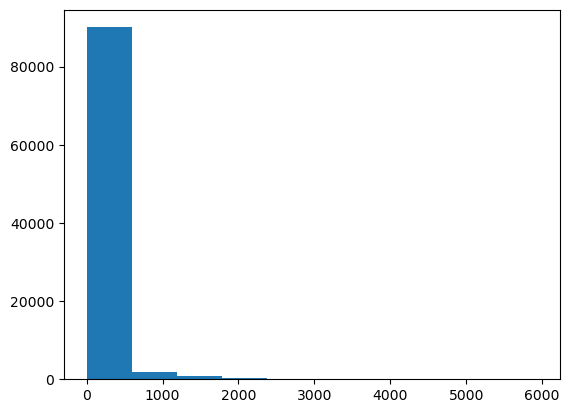

In [172]:
plt.hist(Bike_Count['Flow_Median'])
plt.show()

In [170]:
Bike_Count.to_csv('./Data/CitiBike/CitiBike_Route/Bike_Count.csv')

## Clean Data

In [181]:
len(Bike_Count)

93202

In [183]:
# keep segments with citibike flow
Bike_Sample = Bike_Count.loc[Bike_Count['Flow_Median'] >0]
len(Bike_Sample)

29740

In [184]:
Bike_Sample.describe()

,Flow_Day_0,Flow_Day_1,Flow_Day_2,Flow_Day_3,Flow_Day_4,Flow_Day_5,Flow_Day_6,Flow_Day_7,Flow_Day_8,Flow_Day_9,...,Flow_Day_23,Flow_Day_24,Flow_Day_25,Flow_Day_26,Flow_Day_27,Flow_Day_28,Flow_Day_29,Flow_Median,Flow_Mean,Flow_Total
count,29740.000000,29740.000000,29740.000000,29740.000000,29740.000000,29740.000000,29740.000000,29740.000000,29740.000000,29740.000000,...,29740.000000,29740.000000,29740.000000,29740.000000,29740.000000,29740.000000,29740.000000,29740.000000,29740.000000,29740.00000
mean,94.773605,283.680464,243.598689,237.929388,184.083625,223.738601,221.983726,231.362441,154.022831,260.433826,...,236.846469,274.576429,242.129523,217.642334,196.394822,228.804069,231.180868,229.914728,227.853060,6850.10770
std,174.028093,545.824732,457.129281,455.516393,346.773304,425.448420,424.987290,447.195271,288.001165,502.001901,...,465.328411,536.045917,467.222667,428.341196,386.337017,450.073279,456.171084,446.927057,439.364105,13181.04411
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,20.00000
25%,8.000000,23.000000,19.000000,18.000000,14.000000,17.000000,17.000000,18.000000,12.000000,19.000000,...,17.000000,17.000000,16.000000,15.000000,14.000000,16.000000,16.000000,16.000000,16.000000,506.75000
50%,30.000000,85.000000,75.000000,71.000000,55.500000,66.000000,64.000000,65.000000,46.000000,73.000000,...,62.000000,72.000000,66.000000,58.000000,52.000000,61.000000,61.000000,63.000000,64.000000,1938.00000
75%,99.000000,281.000000,247.000000,241.000000,186.000000,229.000000,222.000000,229.000000,158.000000,262.000000,...,229.000000,273.000000,244.000000,218.000000,193.000000,224.000000,226.000000,230.000000,229.000000,6877.00000
max,2015.000000,7698.000000,5950.000000,6580.000000,4644.000000,6221.000000,5641.000000,5658.000000,3472.000000,6747.000000,...,6057.000000,7387.000000,6453.000000,5827.000000,4959.000000,5880.000000,5827.000000,5940.000000,5881.000000,176447.00000


In [187]:
Bike_Sample['Flow_Median'].quantile(0.01)

1.0

In [186]:
Bike_Sample['Flow_Median'].quantile(0.99)

2143.220000000001

In [190]:
# filter out extreme value

Bike_Sample = Bike_Sample.loc[(Bike_Sample['Flow_Median'] >1) & (Bike_Sample['Flow_Median'] < 2143) ]
len(Bike_Sample)

28416

In [191]:
Bike_Sample.to_csv('./Data/CitiBike/CitiBike_Route/Bike_Sample.csv')